<a href="https://colab.research.google.com/github/RIyadhaque492/Rangpur_Team_Recursion/blob/main/KP_Predict_Imputed_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

In [ ]:
corrected_mean= pd.read_csv('/content/drive/MyDrive/NASA/combined_data.csv')

In [ ]:
import numpy as np

def calculate_velocity(spectrum, magnetic_field):

    return np.mean(spectrum)

def calculate_density(spectrum, magnetic_field):

    return np.median(spectrum)/100

def calculate_temperature(spectrum, magnetic_field):

    return np.std(spectrum)*10000


velocities = []
densities = []
temperatures = []

for index, row in corrected_mean.iterrows():

    spectrum = row.iloc[4:36].values
    magnetic_field = row.iloc[1:4].values


    velocity = calculate_velocity(spectrum, magnetic_field)
    density = calculate_density(spectrum, magnetic_field)
    temperature = calculate_temperature(spectrum, magnetic_field)

    velocities.append(velocity)
    densities.append(density)
    temperatures.append(temperature)

corrected_mean['Speed'] = velocities
corrected_mean['Density'] = densities
corrected_mean['Temperature'] = temperatures

In [ ]:
corrected_mean

,Time,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,...,Spectrum_29,Spectrum_30,Spectrum_31,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature
0,2022-01-01 00:00:00,-6.17170,1.124830,-4.902280,38.031400,0.231726,46.04270,44.974300,55.91430,43.706900,...,384.603241,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,289.412844,3.608365,1.626628e+06
1,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.386800,0.231726,45.52570,46.258700,55.14280,43.276800,...,384.603241,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,289.662257,3.583535,1.622326e+06
2,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.563600,0.231726,45.19550,46.822200,55.74840,42.789400,...,384.603241,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,288.349043,3.613180,1.625701e+06
3,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.109400,0.242084,46.70830,47.171300,53.53800,42.155800,...,384.603241,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,287.439235,3.591770,1.609074e+06
4,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.589300,0.231726,47.48880,45.323400,54.54040,44.277300,...,384.603241,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,290.435285,3.602655,1.618662e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701275,2023-05-02 23:55:00,4.33665,2.801270,0.954633,1.004790,0.231726,4.64757,0.626576,3.54595,0.231726,...,299.219000,311.428000,304.097000,254.954000,366.251985,293.796098,362.483856,225.577988,2.478990,1.737780e+06
701276,2023-05-02 23:56:00,4.66778,2.105820,1.260660,0.781621,0.231726,5.97222,0.360648,3.39143,0.231726,...,302.127000,315.270000,303.676000,256.081000,366.251985,293.796098,362.483856,224.850616,2.451460,1.739318e+06
701277,2023-05-02 23:57:00,4.28322,3.021540,0.927773,0.854185,0.231726,8.10454,2.025800,4.22000,0.231726,...,304.609000,317.534000,311.326000,252.661000,366.251985,293.796098,362.483856,224.540985,2.430230,1.740200e+06
701278,2023-05-02 23:58:00,4.31376,2.677270,1.723270,0.801559,0.231726,12.76210,2.818550,4.82242,0.301864,...,299.132000,318.317000,317.727000,261.104000,366.251985,293.796098,362.483856,226.139155,2.531440,1.748185e+06


In [ ]:
from sklearn.ensemble import IsolationForest

data = corrected_mean[['Speed', 'Density', 'Temperature']]

clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(data)

corrected_mean['Outlier'] = outliers
anomalies_isolation_forest = corrected_mean[corrected_mean['Outlier'] == -1]
print("Anomalies detected by Isolation Forest:\n", anomalies_isolation_forest)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected by Isolation Forest:
                        Time       Bx       By       Bz  Spectrum_1  \
10650   2022-01-08 09:30:00 -2.91657 -2.20051  3.59891    63.31630   
10651   2022-01-08 09:31:00 -2.70032 -2.01849  3.75106    71.95400   
10652   2022-01-08 09:32:00 -2.79900 -2.03161  3.61503    75.69680   
10653   2022-01-08 09:33:00 -2.95779 -2.28750  3.24900    73.99230   
10654   2022-01-08 09:34:00 -2.90854 -2.60814  3.17138    71.16850   
...                     ...      ...      ...      ...         ...   
690919  2023-04-25 19:19:00  3.01031 -1.89249 -2.01575     1.88911   
690923  2023-04-25 19:23:00  2.96497 -1.94921 -2.19294     2.06925   
690925  2023-04-25 19:25:00  3.02821 -2.16353 -1.96070     1.80015   
690926  2023-04-25 19:26:00  3.01040 -2.00935 -2.05623     1.81674   
690929  2023-04-25 19:29:00  3.25993 -2.32434 -1.24346     1.78029   

        Spectrum_2  Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  \
10650    17.121500     80.6973     96.8432 

In [ ]:
corrected_mean.set_index('Time', inplace=True)

In [ ]:
import pandas as pd
corrected_mean.index = pd.to_datetime(corrected_mean.index)


In [ ]:
corrected_mean

,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_30,Spectrum_31,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature,Outlier
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-6.17170,1.124830,-4.902280,38.031400,0.231726,46.04270,44.974300,55.91430,43.706900,65.953700,...,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,289.412844,3.608365,1.626628e+06,1
2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.386800,0.231726,45.52570,46.258700,55.14280,43.276800,65.272000,...,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,289.662257,3.583535,1.622326e+06,1
2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.563600,0.231726,45.19550,46.822200,55.74840,42.789400,61.460100,...,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,288.349043,3.613180,1.625701e+06,1
2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.109400,0.242084,46.70830,47.171300,53.53800,42.155800,63.757300,...,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,287.439235,3.591770,1.609074e+06,1
2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.589300,0.231726,47.48880,45.323400,54.54040,44.277300,69.990800,...,390.811042,376.460925,334.885219,366.251985,293.796098,362.483856,290.435285,3.602655,1.618662e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02 23:55:00,4.33665,2.801270,0.954633,1.004790,0.231726,4.64757,0.626576,3.54595,0.231726,1.795390,...,311.428000,304.097000,254.954000,366.251985,293.796098,362.483856,225.577988,2.478990,1.737780e+06,1
2023-05-02 23:56:00,4.66778,2.105820,1.260660,0.781621,0.231726,5.97222,0.360648,3.39143,0.231726,0.506513,...,315.270000,303.676000,256.081000,366.251985,293.796098,362.483856,224.850616,2.451460,1.739318e+06,1
2023-05-02 23:57:00,4.28322,3.021540,0.927773,0.854185,0.231726,8.10454,2.025800,4.22000,0.231726,2.344650,...,317.534000,311.326000,252.661000,366.251985,293.796098,362.483856,224.540985,2.430230,1.740200e+06,1


In [ ]:
final_mean =corrected_mean.resample('3H').mean()

In [ ]:
final_mean

,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_30,Spectrum_31,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature,Outlier
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-4.839264,3.425409,-3.981092,21.336303,0.237516,57.643330,63.412527,32.678658,24.014905,48.264590,...,380.371140,371.838987,296.581399,363.398036,293.796098,362.483856,270.580353,3.150730,1.659277e+06,1.0
2022-01-01 03:00:00,-5.617356,4.471815,-2.293990,0.897929,0.231726,75.965496,40.013559,2.278711,5.980291,55.260793,...,357.759394,320.249633,233.219656,365.756813,293.796098,362.483856,248.298302,2.906192,1.639877e+06,1.0
2022-01-01 06:00:00,-4.638580,6.123312,1.581305,20.653933,2.858662,60.666213,39.999173,31.800480,28.583863,63.623970,...,366.913696,334.838500,270.353788,359.339803,291.425550,364.273636,260.980047,3.064176,1.608977e+06,1.0
2022-01-01 09:00:00,-5.268603,7.395730,1.988727,2.235783,0.574892,103.651618,41.059841,2.735568,0.701223,43.152109,...,505.944161,414.743311,268.298256,318.160822,313.363889,393.498600,242.137343,2.388277,1.854420e+06,1.0
2022-01-01 12:00:00,-5.940403,5.913173,1.036579,11.447173,0.252509,44.407353,15.639526,4.502054,2.277985,28.101569,...,456.207539,402.833472,324.779283,346.942639,291.238328,351.916250,240.587358,2.629618,1.804020e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02 09:00:00,4.527340,-0.300102,0.244972,1.264590,0.231726,0.392370,0.231726,0.232078,0.231726,0.231726,...,324.415717,376.460925,334.885219,366.251985,293.796098,362.483856,221.406363,2.478722,1.777304e+06,1.0
2023-05-02 12:00:00,3.569858,1.563384,1.443822,1.263190,0.231726,0.354059,0.231726,0.231726,0.231726,0.231726,...,325.995994,376.460925,334.885219,366.251985,293.796098,362.483856,221.504724,2.463755,1.778354e+06,1.0
2023-05-02 15:00:00,4.224378,0.180576,-0.906981,1.123050,0.231726,0.886440,0.353309,0.397666,0.231726,0.232609,...,341.870400,363.610934,312.814784,348.334167,270.488235,361.137621,222.507243,2.451556,1.783290e+06,1.0


In [ ]:
L2_df1 = final_mean.drop('Outlier', axis=1)

In [ ]:
L2_df1

,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_29,Spectrum_30,Spectrum_31,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-4.839264,3.425409,-3.981092,21.336303,0.237516,57.643330,63.412527,32.678658,24.014905,48.264590,...,316.387958,380.371140,371.838987,296.581399,363.398036,293.796098,362.483856,270.580353,3.150730,1.659277e+06
2022-01-01 03:00:00,-5.617356,4.471815,-2.293990,0.897929,0.231726,75.965496,40.013559,2.278711,5.980291,55.260793,...,313.645106,357.759394,320.249633,233.219656,365.756813,293.796098,362.483856,248.298302,2.906192,1.639877e+06
2022-01-01 06:00:00,-4.638580,6.123312,1.581305,20.653933,2.858662,60.666213,39.999173,31.800480,28.583863,63.623970,...,347.075556,366.913696,334.838500,270.353788,359.339803,291.425550,364.273636,260.980047,3.064176,1.608977e+06
2022-01-01 09:00:00,-5.268603,7.395730,1.988727,2.235783,0.574892,103.651618,41.059841,2.735568,0.701223,43.152109,...,475.484511,505.944161,414.743311,268.298256,318.160822,313.363889,393.498600,242.137343,2.388277,1.854420e+06
2022-01-01 12:00:00,-5.940403,5.913173,1.036579,11.447173,0.252509,44.407353,15.639526,4.502054,2.277985,28.101569,...,472.958972,456.207539,402.833472,324.779283,346.942639,291.238328,351.916250,240.587358,2.629618,1.804020e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02 09:00:00,4.527340,-0.300102,0.244972,1.264590,0.231726,0.392370,0.231726,0.232078,0.231726,0.231726,...,312.017006,324.415717,376.460925,334.885219,366.251985,293.796098,362.483856,221.406363,2.478722,1.777304e+06
2023-05-02 12:00:00,3.569858,1.563384,1.443822,1.263190,0.231726,0.354059,0.231726,0.231726,0.231726,0.231726,...,318.515961,325.995994,376.460925,334.885219,366.251985,293.796098,362.483856,221.504724,2.463755,1.778354e+06
2023-05-02 15:00:00,4.224378,0.180576,-0.906981,1.123050,0.231726,0.886440,0.353309,0.397666,0.231726,0.232609,...,335.181300,341.870400,363.610934,312.814784,348.334167,270.488235,361.137621,222.507243,2.451556,1.783290e+06


In [ ]:
L2_df1.to_csv('/content/drive/MyDrive/NASA/L2_1.csv', index=True)

In [ ]:
list_Kp_files = [

                    "/content/drive/MyDrive/NASA/kp/Kp_ap_2022.txt",
                     "/content/drive/MyDrive/NASA/kp/Kp_ap_2023.txt"
                    ]

In [ ]:
header_Kp_files = ["YYY", "MM", "DD", "hh.h", "hh._m", "days", "days_m",
                   "Kp", "ap", "D"]

In [ ]:
text_content = []
data_content = []

def read_txt_file(name_file):

    with open(name_file, 'r') as file:
        lines = file.readlines()
        text_content = lines[:30]
        data_content = lines[30:]
    text_content = "".join(text_content)
    data = []
    for line in data_content:
        split_line = [float(i) if i.replace('.','',1).isdigit() else i for i in line.split()]
        data.append(split_line)

    df_data = pd.DataFrame(data)

    return df_data

In [ ]:
count = 0

for KP_data_file in list_Kp_files:

    if count == 0:
        KP_data_all = read_txt_file(KP_data_file)

    else:
        KP_data_all = pd.concat([KP_data_all, read_txt_file(KP_data_file) ])

    count += 1

KP_data_all.reset_index(inplace=True, drop=True)

In [ ]:
KP_data_all

,0,1,2,3,4,5,6,7,8,9
0,2022.0,1.0,1.0,0.0,1.5,32873.000,32873.0625,2.333,9.0,2.0
1,2022.0,1.0,1.0,3.0,4.5,32873.125,32873.1875,4.000,27.0,2.0
2,2022.0,1.0,1.0,6.0,7.5,32873.250,32873.3125,2.333,9.0,2.0
3,2022.0,1.0,1.0,9.0,10.5,32873.375,32873.4375,1.667,6.0,2.0
4,2022.0,1.0,1.0,12.0,13.5,32873.500,32873.5625,1.667,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5147,2023.0,10.0,6.0,9.0,10.5,33516.375,33516.4375,1.333,5.0,0.0
5148,2023.0,10.0,6.0,12.0,13.5,33516.500,33516.5625,1.000,4.0,0.0
5149,2023.0,10.0,6.0,15.0,16.5,33516.625,33516.6875,1.333,5.0,0.0
5150,2023.0,10.0,6.0,18.0,19.5,33516.750,33516.8125,0.667,3.0,0.0


In [ ]:
key_list = list(range(0,10))
val_list = header_Kp_files
iterable = zip(key_list, val_list)
dict_Kp = {key_list: val_list for key_list,val_list in iterable }
KP_data_all = KP_data_all.rename(columns=dict_Kp)
KP_data_all.head(3)

,YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,2022.0,1.0,1.0,0.0,1.5,32873.000,32873.0625,2.333,9.0,2.0
1,2022.0,1.0,1.0,3.0,4.5,32873.125,32873.1875,4.000,27.0,2.0
2,2022.0,1.0,1.0,6.0,7.5,32873.250,32873.3125,2.333,9.0,2.0


In [ ]:
KP_data_all['hh.h'] = KP_data_all.apply(lambda x: "0"+str(int(x["hh.h"])) if len(str(int(x["hh.h"])))==1 else str(int(x["hh.h"])), axis=1)
KP_data_all['MM'] = KP_data_all.apply(lambda x: "0"+str(int(x["MM"])) if len(str(int(x["MM"])))==1 else str(int(x["MM"])), axis=1)
KP_data_all['DD'] = KP_data_all.apply(lambda x: "0"+str(int(x["DD"])) if len(str(int(x["DD"])))==1 else str(int(x["DD"])), axis=1)
KP_data_all['KP_datetime_init'] = KP_data_all.apply(lambda x: str(int(x['YYY'])) +'-'+ x['MM']+'-'+ x['DD'] +" "+ x['hh.h'] +":"+"00"+":"+"00", axis=1)
KP_data_all['KP_datetime_init'] = pd.to_datetime(KP_data_all['KP_datetime_init'], format="%Y-%m-%d %H:%M:%S")
KP_data_all = KP_data_all[['KP_datetime_init','Kp','ap']]
KP_data_all = KP_data_all.replace(-1, np.nan).copy()
KP_data_all = KP_data_all.replace(-1.000, np.nan).copy()
KP_data_all.reset_index(inplace=True, drop=True)
KP_data_all.head(3)

,KP_datetime_init,Kp,ap
0,2022-01-01 00:00:00,2.333,9.0
1,2022-01-01 03:00:00,4.000,27.0
2,2022-01-01 06:00:00,2.333,9.0


In [ ]:
KP_data_all = KP_data_all.set_index('KP_datetime_init')
KP_data_all


,Kp,ap
KP_datetime_init,,
2022-01-01 00:00:00,2.333,9.0
2022-01-01 03:00:00,4.000,27.0
2022-01-01 06:00:00,2.333,9.0
2022-01-01 09:00:00,1.667,6.0
2022-01-01 12:00:00,1.667,6.0
...,...,...
2023-10-06 09:00:00,1.333,5.0
2023-10-06 12:00:00,1.000,4.0
2023-10-06 15:00:00,1.333,5.0


In [ ]:
KP_data_all.isna().sum(axis=0)

Kp    0
ap    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt


<Axes: >

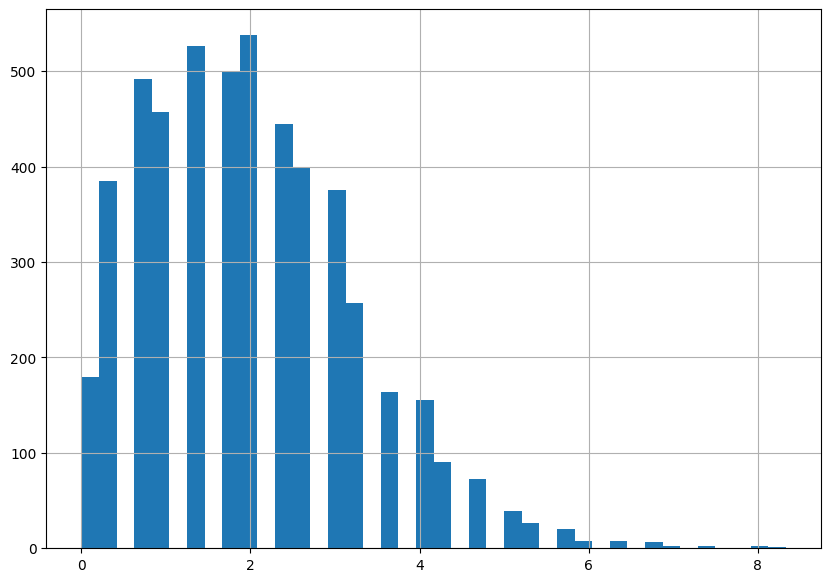

In [ ]:
plt.figure(figsize=(10,7))
KP_data_all['Kp'].hist(bins=40)




In [ ]:
KP_data_all['Kp_class'] = KP_data_all.apply(lambda x: int(x['Kp']), axis=1)

In [ ]:
KP_data_all['Kp']

KP_datetime_init
2022-01-01 00:00:00    2.333
2022-01-01 03:00:00    4.000
2022-01-01 06:00:00    2.333
2022-01-01 09:00:00    1.667
2022-01-01 12:00:00    1.667
                       ...  
2023-10-06 09:00:00    1.333
2023-10-06 12:00:00    1.000
2023-10-06 15:00:00    1.333
2023-10-06 18:00:00    0.667
2023-10-06 21:00:00    3.000
Name: Kp, Length: 5152, dtype: float64

<Axes: >

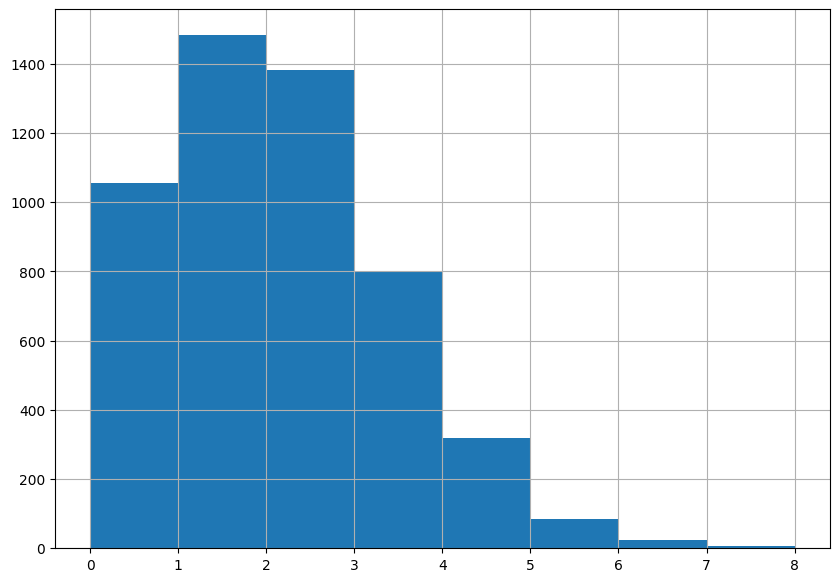

In [ ]:
plt.figure(figsize=(10,7))
KP_data_all['Kp_class'].hist(bins=8)

In [ ]:
DSCOVR_Mean = L2_df1.join(KP_data_all)
DSCOVR_Mean.reset_index(inplace=True)
DSCOVR_Mean.head(10000)

,Time,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,...,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature,Kp,ap,Kp_class
0,2022-01-01 00:00:00,-4.839264,3.425409,-3.981092,21.336303,0.237516,57.643330,63.412527,32.678658,24.014905,...,296.581399,363.398036,293.796098,362.483856,270.580353,3.150730,1.659277e+06,2.333,9.0,2
1,2022-01-01 03:00:00,-5.617356,4.471815,-2.293990,0.897929,0.231726,75.965496,40.013559,2.278711,5.980291,...,233.219656,365.756813,293.796098,362.483856,248.298302,2.906192,1.639877e+06,4.000,27.0,4
2,2022-01-01 06:00:00,-4.638580,6.123312,1.581305,20.653933,2.858662,60.666213,39.999173,31.800480,28.583863,...,270.353788,359.339803,291.425550,364.273636,260.980047,3.064176,1.608977e+06,2.333,9.0,2
3,2022-01-01 09:00:00,-5.268603,7.395730,1.988727,2.235783,0.574892,103.651618,41.059841,2.735568,0.701223,...,268.298256,318.160822,313.363889,393.498600,242.137343,2.388277,1.854420e+06,1.667,6.0,1
4,2022-01-01 12:00:00,-5.940403,5.913173,1.036579,11.447173,0.252509,44.407353,15.639526,4.502054,2.277985,...,324.779283,346.942639,291.238328,351.916250,240.587358,2.629618,1.804020e+06,1.667,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,2023-05-02 09:00:00,4.527340,-0.300102,0.244972,1.264590,0.231726,0.392370,0.231726,0.232078,0.231726,...,334.885219,366.251985,293.796098,362.483856,221.406363,2.478722,1.777304e+06,2.667,12.0,2
3892,2023-05-02 12:00:00,3.569858,1.563384,1.443822,1.263190,0.231726,0.354059,0.231726,0.231726,0.231726,...,334.885219,366.251985,293.796098,362.483856,221.504724,2.463755,1.778354e+06,1.000,4.0,1
3893,2023-05-02 15:00:00,4.224378,0.180576,-0.906981,1.123050,0.231726,0.886440,0.353309,0.397666,0.231726,...,312.814784,348.334167,270.488235,361.137621,222.507243,2.451556,1.783290e+06,1.000,4.0,1
3894,2023-05-02 18:00:00,3.445592,3.224468,-1.600414,0.354338,0.231726,3.591731,20.420421,12.804472,0.238711,...,301.917267,365.056224,292.591774,362.304396,229.123496,2.574925,1.789758e+06,1.667,6.0,1


In [ ]:
DSCOVR_Mean.to_csv('/content/drive/MyDrive/NASA/DSCOVR_Mean.csv', index=False)


In [ ]:
DSCOVR_Mean.head(5)

,Time,Bx,By,Bz,Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,...,Spectrum_32,Spectrum_33,Spectrum_34,Spectrum_35,Speed,Density,Temperature,Kp,ap,Kp_class
0,2022-01-01 00:00:00,-4.839264,3.425409,-3.981092,21.336303,0.237516,57.643330,63.412527,32.678658,24.014905,...,296.581399,363.398036,293.796098,362.483856,270.580353,3.150730,1.659277e+06,2.333,9.0,2
1,2022-01-01 03:00:00,-5.617356,4.471815,-2.293990,0.897929,0.231726,75.965496,40.013559,2.278711,5.980291,...,233.219656,365.756813,293.796098,362.483856,248.298302,2.906192,1.639877e+06,4.000,27.0,4
2,2022-01-01 06:00:00,-4.638580,6.123312,1.581305,20.653933,2.858662,60.666213,39.999173,31.800480,28.583863,...,270.353788,359.339803,291.425550,364.273636,260.980047,3.064176,1.608977e+06,2.333,9.0,2
3,2022-01-01 09:00:00,-5.268603,7.395730,1.988727,2.235783,0.574892,103.651618,41.059841,2.735568,0.701223,...,268.298256,318.160822,313.363889,393.498600,242.137343,2.388277,1.854420e+06,1.667,6.0,1
4,2022-01-01 12:00:00,-5.940403,5.913173,1.036579,11.447173,0.252509,44.407353,15.639526,4.502054,2.277985,...,324.779283,346.942639,291.238328,351.916250,240.587358,2.629618,1.804020e+06,1.667,6.0,1


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(DSCOVR_Mean.iloc[:, 1:])

In [ ]:

train_size = int(len(scaled_data) * 0.67)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :-1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


Epoch 1/1000
98/98 [==============================] - 5s 21ms/step - loss: 2.1039 - val_loss: 1.6366
Epoch 2/1000
98/98 [==============================] - 2s 18ms/step - loss: 1.5377 - val_loss: 1.5886
Epoch 3/1000
98/98 [==============================] - 3s 26ms/step - loss: 1.5138 - val_loss: 1.5417
Epoch 4/1000
98/98 [==============================] - 3s 28ms/step - loss: 1.4810 - val_loss: 1.5429
Epoch 5/1000
98/98 [==============================] - 2s 18ms/step - loss: 1.4336 - val_loss: 1.4520
Epoch 6/1000
98/98 [==============================] - 2s 18ms/step - loss: 1.4364 - val_loss: 1.4192
Epoch 7/1000
98/98 [==============================] - 2s 18ms/step - loss: 1.3700 - val_loss: 1.3652
Epoch 8/1000
98/98 [==============================] - 2s 18ms/step - loss: 1.3071 - val_loss: 1.3211
Epoch 9/1000
98/98 [==============================] - 2s 19ms/step - loss: 1.3251 - val_loss: 1.4276
Epoch 10/1000
98/98 [==============================] - 3s 32ms/step - loss: 1.2587 - val_lo

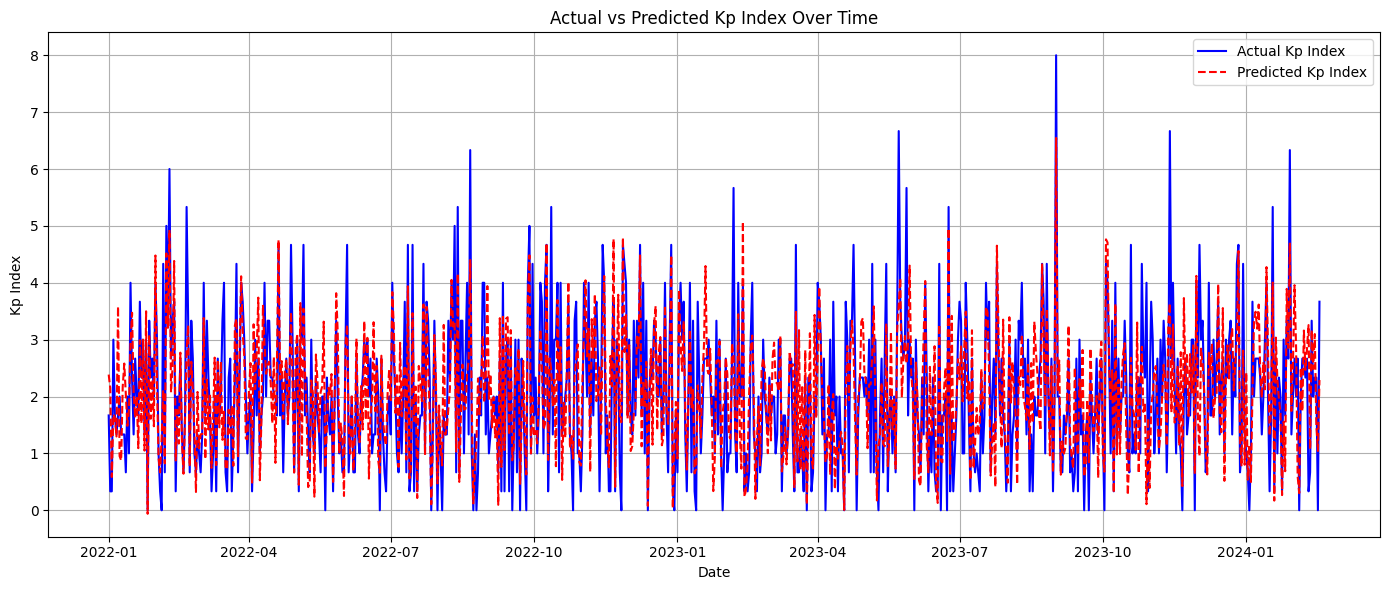

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
dates = pd.date_range(start="2022-01-01", periods=778, freq='D')

df = pd.read_csv('/content/drive/MyDrive/NASA/DSCOVR_Mean.csv')

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Speed', 'Temperature', 'Bz', 'Density']])
y = df['Kp'].values
sequence_length = 10
X_seq, y_seq = [], []
for i in range(len(df) - sequence_length):
    X_seq.append(X[i:i+sequence_length])
    y_seq.append(y[i+sequence_length])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test).flatten()

def classify_kp(kp_value):
    if 0 <= kp_value <= 2:
        return 'Quiet'
    elif 3 <= kp_value <= 4:
        return 'Active'
    elif kp_value == 5:
        return 'Minor Storm'
    elif kp_value == 6:
        return 'Moderate Storm'
    elif kp_value == 7:
        return 'Strong Storm'
    elif kp_value == 8:
        return 'Severe Storm'
    elif kp_value == 9:
        return 'Extreme Storm'
    else:
        return 'Unknown'

y_test_classified = [classify_kp(val) for val in y_test]
y_pred_classified = [classify_kp(val) for val in y_pred]

dates_test = dates[-len(y_pred):]
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual Kp Index', color='blue')
plt.plot(dates_test, y_pred, label='Predicted Kp Index', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Kp Index Over Time')
plt.xlabel('Date')
plt.ylabel('Kp Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

def classify_kp_to_int(kp_value):
    if 0 <= kp_value <= 2:
        return 0  # Quiet
    elif 3 <= kp_value <= 4:
        return 1  # Active
    elif kp_value == 5:
        return 2  # Minor Storm
    elif kp_value == 6:
        return 3  # Moderate Storm
    elif kp_value == 7:
        return 4  # Strong Storm
    elif kp_value == 8:
        return 5  # Severe Storm
    elif kp_value == 9:
        return 6  # Extreme Storm
    else:
        return -1  # Unknown

y_test_classified = [classify_kp_to_int(val) for val in y_test]
y_pred_classified = [classify_kp_to_int(val) for val in y_pred]

acc = accuracy_score(y_test_classified, y_pred_classified)
print(f"Classification Accuracy: {acc * 100:.2f}%")


Classification Accuracy: 56.94%


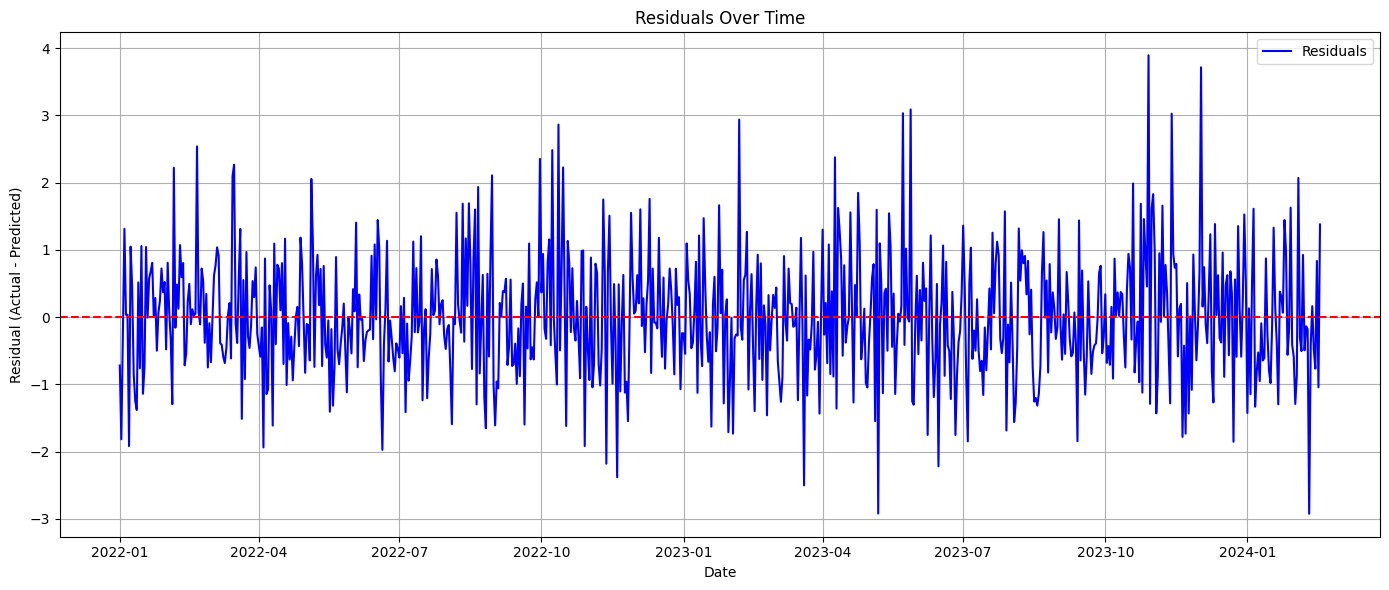

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))
plt.plot(dates_test, residuals, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='dashed')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


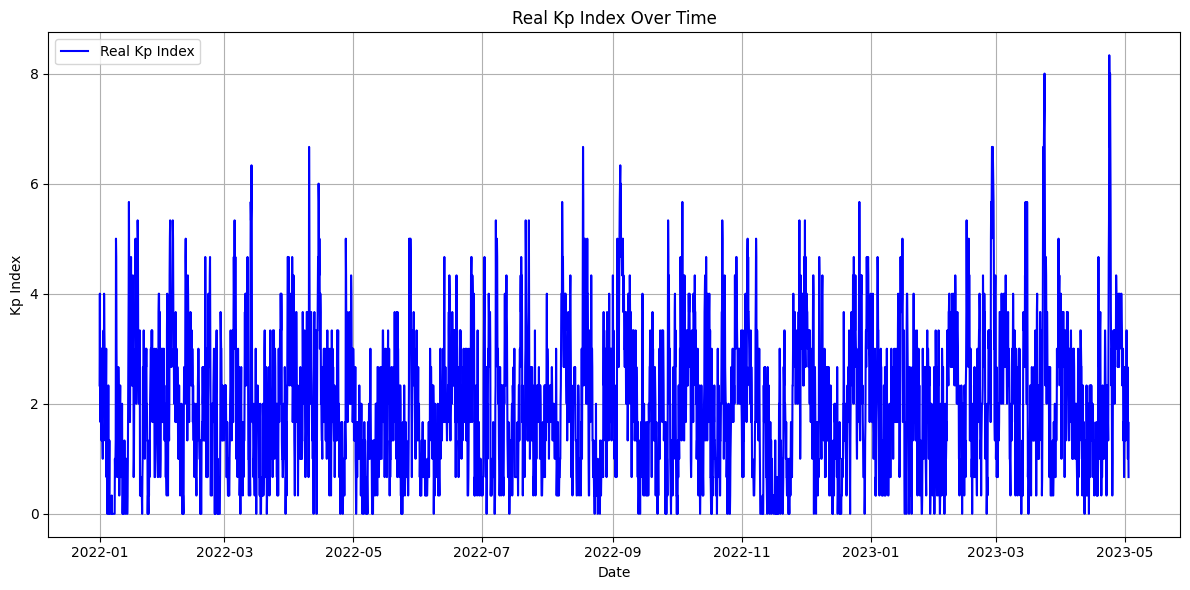

Epoch 1/1000
98/98 [==============================] - 5s 20ms/step - loss: 2.5243 - val_loss: 1.7056
Epoch 2/1000
98/98 [==============================] - 2s 16ms/step - loss: 1.6800 - val_loss: 1.6390
Epoch 3/1000
98/98 [==============================] - 2s 17ms/step - loss: 1.5440 - val_loss: 1.4493
Epoch 4/1000
98/98 [==============================] - 2s 25ms/step - loss: 1.3878 - val_loss: 1.5941
Epoch 5/1000
98/98 [==============================] - 3s 26ms/step - loss: 1.3397 - val_loss: 1.2535
Epoch 6/1000
98/98 [==============================] - 2s 17ms/step - loss: 1.2158 - val_loss: 1.2224
Epoch 7/1000
98/98 [==============================] - 2s 17ms/step - loss: 1.1741 - val_loss: 1.1625
Epoch 8/1000
98/98 [==============================] - 2s 17ms/step - loss: 1.1179 - val_loss: 1.1495
Epoch 9/1000
98/98 [==============================] - 2s 16ms/step - loss: 1.1250 - val_loss: 1.2235
Epoch 10/1000
98/98 [==============================] - 2s 16ms/step - loss: 1.0880 - val_lo

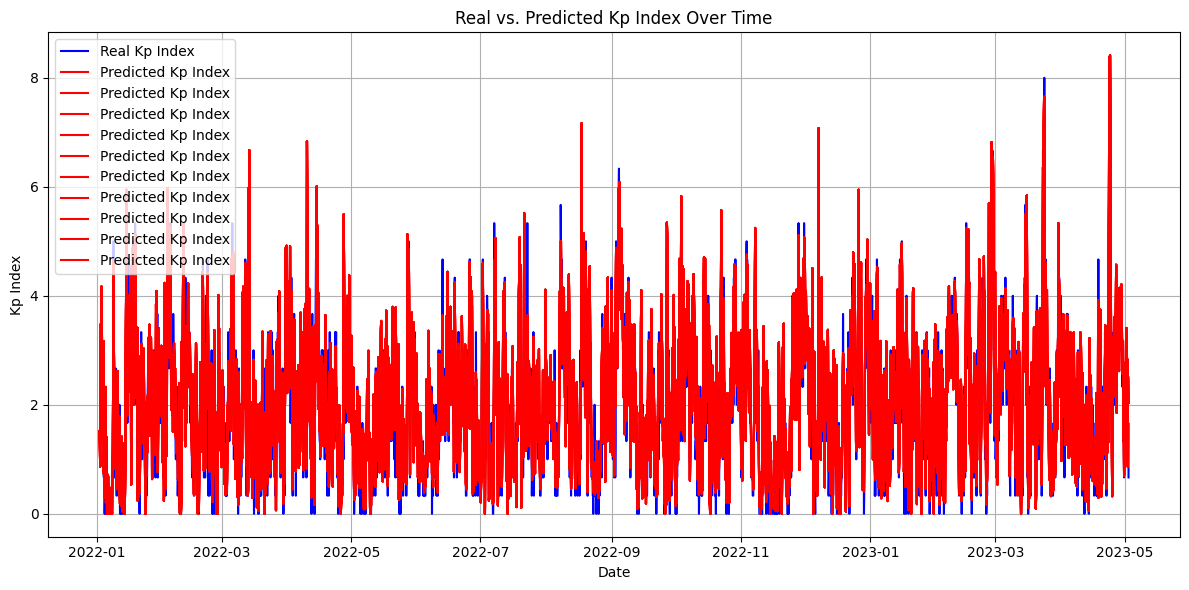

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(12, 6))
plt.plot(DSCOVR_Mean['Time'], DSCOVR_Mean['Kp'], label='Real Kp Index', color='blue')
plt.title('Real Kp Index Over Time')
plt.xlabel('Date')
plt.ylabel('Kp Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

scaler = MinMaxScaler()
X = scaler.fit_transform(DSCOVR_Mean[['Speed', 'Temperature', 'Bz', 'Density']])
y = DSCOVR_Mean['Kp'].values

sequence_length = 10
X_seq, y_seq = [], []
for i in range(len(DSCOVR_Mean) - sequence_length):
    X_seq.append(X[i:i+sequence_length])
    y_seq.append(y[i+sequence_length])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.GRU(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GRU(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_seq)

y_pred_classified = [classify_kp(value[0]) for value in y_pred]

plt.figure(figsize=(12, 6))
plt.plot(DSCOVR_Mean['Time'][sequence_length:],DSCOVR_Mean['Kp'][sequence_length:], label='Real Kp Index', color='blue')
plt.plot(DSCOVR_Mean['Time'][sequence_length:], y_pred, label='Predicted Kp Index', color='red')
plt.title('Real vs. Predicted Kp Index Over Time')
plt.xlabel('Date')
plt.ylabel('Kp Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

def classify_kp_to_int(kp_value):
    if 0 <= kp_value <= 2:
        return 0  # Quiet
    elif 3 <= kp_value <= 4:
        return 1  # Active
    elif kp_value == 5:
        return 2  # Minor Storm
    elif kp_value == 6:
        return 3  # Moderate Storm
    elif kp_value == 7:
        return 4  # Strong Storm
    elif kp_value == 8:
        return 5  # Severe Storm
    elif kp_value == 9:
        return 6  # Extreme Storm
    else:
        return -1  # Unknown

y_true_classified = [classify_kp(value) for value in y_seq]
y_pred_classified = [classify_kp(value[0]) for value in y_pred]

correct_predictions = np.sum(np.array(y_true_classified) == np.array(y_pred_classified))
accuracy = correct_predictions / len(y_true_classified) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 80.13%
